# Задание 3

Миграция Кирхгофа часть 2.

Задание состоит в следующем:

  1. Загрузить SEG-Y файл c сейсмическим разрезом.
  2. Загрузить SEG-Y файл c моделью RMS скоростей.
  3. Рассчитать миграцию по аналогии с прошлым заданием, но со скоростями из модели.


 ### Часть 1. Импорт сейсмических данных
 В качестве примера возьмите код к прошлому заданию.
 
 Вначале стандартный импорт библиотек.

In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

файл, который надо загрузить, называется `Seismic_data7.sgy`. Поскольку он находится в той же папке, что и эта тетрадка, обращаться к нему надо по адресу `r"./Seismic_data7.sgy"`. 

Так программа понимает: точка со слэшем означают, что файл находится в той же папке, что и блокнот. А `r` перед текстом позволяет ей понять, что слэш - это не служебный символ (как обычно в строковых данных питона), а реальный знак слэша. 

Это технические детали.

#### Задание

Импортируйте файл с сейсмическими данными, прочитайте заголовки (не забудьте про шаг дискретизации и коэфициент, на который домножаются координаты), постройте разрез, подпишите оси, чтобы было наглядно. Если требуется, измените диапазон по оси $t$, отрежьте лишнее.

In [2]:
with segyio.open(r"./Seismic_data7.sgy") as seismic_file:
    #data1 = dd.ilines
    dd1 = seismic_file.iline[1]
    x = seismic_file.header[10]
    y = seismic_file.bin
    z = seismic_file.attributes(segyio.TraceField.GroupX)[:]

print('\n'.join(str(x).split(', ')))
print(y)

{TRACE_SEQUENCE_LINE: 11
TRACE_SEQUENCE_FILE: 11
FieldRecord: 1
TraceNumber: 11
EnergySourcePoint: 1
CDP: 11
CDP_TRACE: 11
TraceIdentificationCode: 1
NSummedTraces: 0
NStackedTraces: 0
DataUse: 1
offset: 0
ReceiverGroupElevation: 0
SourceSurfaceElevation: 0
SourceDepth: 0
ReceiverDatumElevation: 0
SourceDatumElevation: 0
SourceWaterDepth: 0
GroupWaterDepth: 0
ElevationScalar: -100
SourceGroupScalar: -100
SourceX: 10002
SourceY: 0
GroupX: 10002
GroupY: 0
CoordinateUnits: 1
WeatheringVelocity: 0
SubWeatheringVelocity: 0
SourceUpholeTime: 0
GroupUpholeTime: 0
SourceStaticCorrection: 0
GroupStaticCorrection: 0
TotalStaticApplied: 0
LagTimeA: 0
LagTimeB: 0
DelayRecordingTime: 0
MuteTimeStart: 0
MuteTimeEND: 0
TRACE_SAMPLE_COUNT: 1001
TRACE_SAMPLE_INTERVAL: 2000
GainType: 0
InstrumentGainConstant: 0
InstrumentInitialGain: 0
Correlated: 0
SweepFrequencyStart: 0
SweepFrequencyEnd: 0
SweepLength: 0
SweepType: 0
SweepTraceTaperLengthStart: 0
SweepTraceTaperLengthEnd: 0
TaperType: 0
AliasFilterFr

In [3]:
scaler = x[segyio.TraceField.ElevationScalar]*(-1)
dt_ms = x[segyio.TraceField.TRACE_SAMPLE_INTERVAL]*0.001
nt = x[segyio.TraceField.TRACE_SAMPLE_COUNT]

In [4]:
x_coord = z/scaler
nx = len(x_coord)
dx = x_coord[1]-x_coord[0]
xmin = np.min(x_coord)
xmax = np.max(x_coord)

t_ms = np.arange(0, nt*dt_ms,dt_ms)
print(t_ms)

[   0.    2.    4. ... 1996. 1998. 2000.]


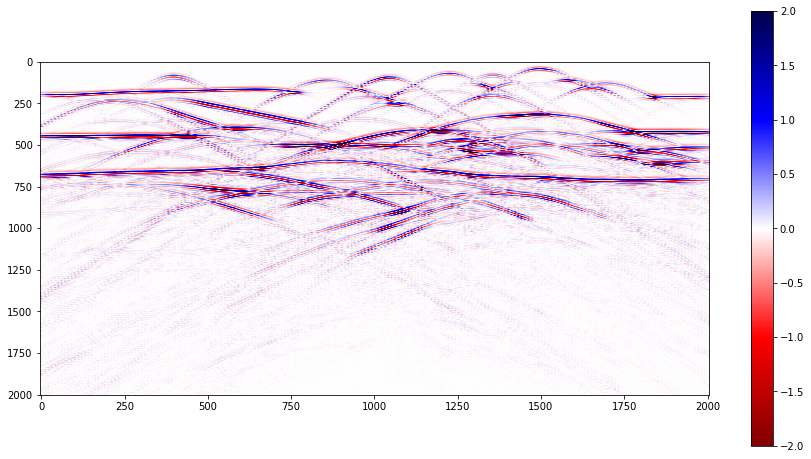

In [5]:
plt.imshow(dd1.T,aspect=0.5,vmin = -2, vmax = 2, cmap = 'seismic_r', interpolation = 'bilinear', extent = [np.min(x_coord)-0.5*dx, np.max(x_coord)+0.5*dx, nt*dt_ms,0])

#plt.imshow(dd1.T,aspect=0.05,vmin = -1000, vmax = 1000, cmap = 'seismic_r', interpolation = 'bilinear')
plt.colorbar()
plt.gcf().set_figheight(8) # увеличиваем высоту картинки
plt.gcf().set_figwidth(15)  # увеличиваем ширину картинки

plt.show()

### Часть 2. Импорт модели скоростей

Файл, который надо загрузить, называется `V_RMS.sgy`.
Он также находится в той же папке, что и этот блокнот.

Размер данных в файле, шаг по $x$ и $t$ совпадает с параметрами сейсмического разреза.


#### Задание

Импортируйте файл с моделью эффективных скоростей, прочитайте заголовки (не забудьте про шаг дискретизации и коэфициент, на который домножаются координаты), постройте разрез, подпишите оси, чтобы было наглядно. Отобразите цветовую шкалу.
 

In [6]:
vel_path = r"./V_RMS.sgy"

with segyio.open(r"./V_RMS.sgy") as vrms_loaded:
    #data1 = dd.ilines
    dd2 = vrms_loaded.iline[1]
    x2 = vrms_loaded.header[10]
    y2 = vrms_loaded.bin
    z2 = vrms_loaded.attributes(segyio.TraceField.GroupX)[:]
    


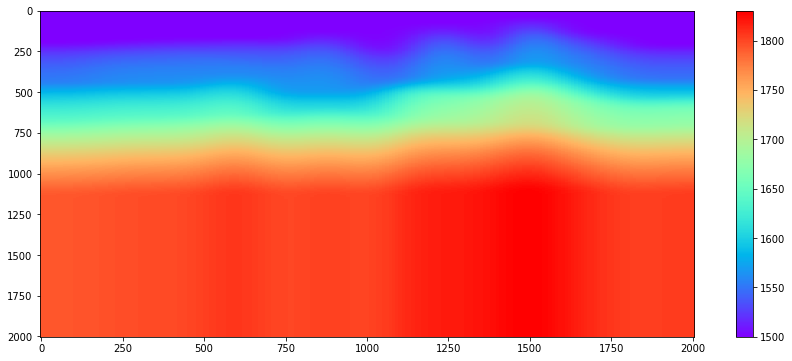

In [7]:
plt.imshow(dd2.T,aspect=0.5, cmap = 'rainbow', interpolation = 'none', extent = [np.min(x_coord)-0.5*dx, np.max(x_coord)+0.5*dx, nt*dt_ms,0])

plt.colorbar()
plt.gcf().set_figheight(6) # увеличиваем высоту картинки
plt.gcf().set_figwidth(15)  # увеличиваем ширину картинки

### Часть 3. Расчет миграции

По аналогии с предыдущим упражнением.

#### Задание

Воспользуйтесь функцией `diffraction_curve_t` из предыдущего задания. Или если вы реализовали расчет с помощью изохрон, можно сделать так.
Значения скорости на сей раз необходимо не задавать в виде константы, а брать из импортированного разреза скоростей.

Подберите апертуру миграции, весовую функцию амплитуд. Если нижняя часть разреза не несет в себе полезной информации, не рассчитывайте миграцию для нее.

Постройте мигрированный разрез.



In [8]:
def diffraction_curve_t(x0, t0, v, halfwidth, x_step):
    x_hyp = np.arange(x0 - halfwidth, x0 + halfwidth + x_step, x_step)
    t_hyp = np.sqrt(t0**2 + (2*(x_hyp - x0)/v)**2)
    return x_hyp, t_hyp

In [9]:
tmin = 0
tmax = np.max(0.001*t_ms)


zmax = 2000
dz = 2
z_array = np.arange(0, zmax, dz)
nz = len(z_array)


aperture = 400



In [10]:
output = np.zeros_like(dd1).astype(float)
for i in range(1, nx-1):
    for j in range(1,(nt-1)//2):
        
        x_h, t_h = diffraction_curve_t(x_coord[i], t_ms[j]*0.001, dd2[i,j], aperture, dx)

        t_hyp = t_h[(t_h > tmin) & (t_h < tmax) & (x_h > xmin) & (x_h < xmax)]
        x_hyp = x_h[(t_h > tmin) & (t_h < tmax) & (x_h > xmin) & (x_h < xmax)]

        #weights = np.ones_like(t_hyp) ## весовые коэффициенты. Пока заданы все равными 1
        weights = (t_hyp*1000/t_ms[j])**-2
        
        migr_value = 0
        
        if len(x_hyp) > 0:
            for k in range(len(x_hyp)):
                migr_value = migr_value + weights[k]*dd1[int(x_hyp[k]/dx), int(1000*t_hyp[k]/dt_ms)]


            output[i,j] = migr_value/len(x_hyp)

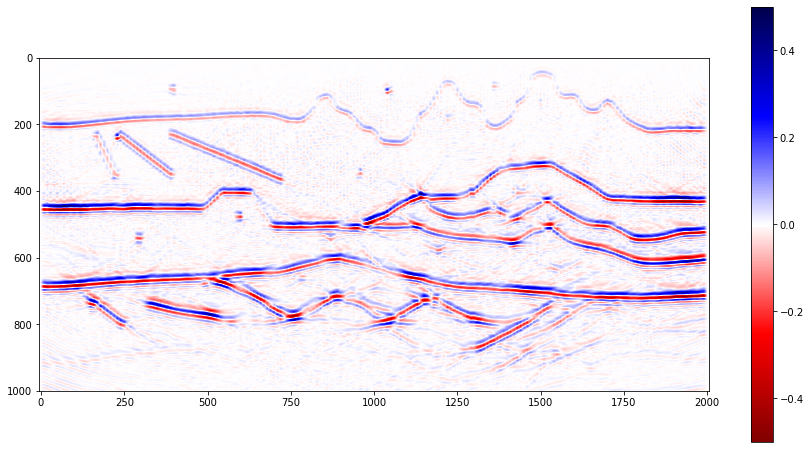

In [14]:
plt.imshow(output.T,aspect=1, vmin = -0.5, vmax = .5, cmap = 'seismic_r', interpolation = 'bilinear', extent = [np.min(x_coord)-0.5*dx, np.max(x_coord)+0.5*dx, 1000*tmax,0])

plt.colorbar()
plt.gcf().set_figheight(8) # увеличиваем высоту картинки
plt.gcf().set_figwidth(15)  # увеличиваем ширину картинки

plt.ylim(bottom = 1000)
plt.show()


#### Задание

Рассчитайте миграцию с каким-либо разумным постоянным значением скорости. Сравните результаты. Сделайте выводы.

In [16]:
output2 = np.zeros_like(dd1).astype(float)
for i in range(1, nx-1):
    for j in range(1,nt-1):
        
        x_h, t_h = diffraction_curve_t(x_coord[i], t_ms[j]*0.001, 1500.0, aperture, dx)

        t_hyp = t_h[(t_h > tmin) & (t_h < tmax) & (x_h > xmin) & (x_h < xmax)]
        x_hyp = x_h[(t_h > tmin) & (t_h < tmax) & (x_h > xmin) & (x_h < xmax)]

        weights = (t_hyp*1000/t_ms[j])**-2
        
        migr_value = 0
        
        if len(x_hyp) > 0:
            for k in range(len(x_hyp)):
                migr_value = migr_value + weights[k]*dd1[int(x_hyp[k]/dx), int(1000*t_hyp[k]/dt_ms)]


            output2[i,j] = migr_value/len(x_hyp)

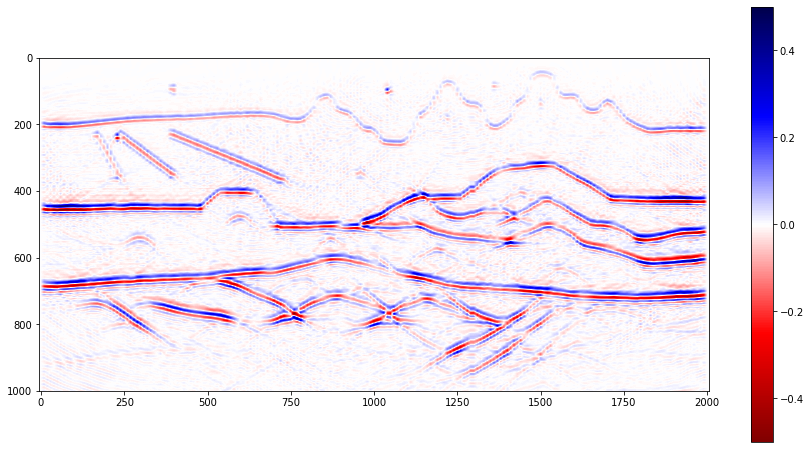

In [17]:
plt.imshow(output2.T,aspect=1, vmin = -0.5, vmax = .5, cmap = 'seismic_r', interpolation = 'bilinear', extent = [np.min(x_coord)-0.5*dx, np.max(x_coord)+0.5*dx, 1000*tmax,0])

plt.colorbar()
plt.gcf().set_figheight(8) # увеличиваем высоту картинки
plt.gcf().set_figwidth(15)  # увеличиваем ширину картинки

plt.ylim(bottom = 1000)
plt.show()
